This notebook actually works given any full_text as input

In [12]:
import json
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

from nlp import extract_nouns

In [5]:
with open("data/c3ai_videos.json", "r", encoding="utf-8") as f:
    data = json.load(f)

title_list = [item["title"] for item in data]

title_list = [re.sub(r'c3\s?ai', '', title, flags=re.IGNORECASE).strip()
                for title in title_list]

full_text = " ".join(title_list)

### Basic wordcloud

In [6]:
def normalize_word(word):
    # basic plural handling
    if word.endswith("ies"):
        return word[:-3] + "y"      # parties -> party
    # elif word.endswith("es"):
    #     return word[:-2]            # boxes -> box
    elif word.endswith("s") and not word.endswith("ss"):
        return word[:-1]            # dogs -> dog
    return word

words = re.findall(r"\b[a-zA-Z]+\b", full_text.lower())

# normalize
normalized = [normalize_word(w) for w in words]

stopwords = set(STOPWORDS)
filtered = [w for w in normalized if w not in stopwords]

# count
counts = Counter(filtered)

# print(counts)

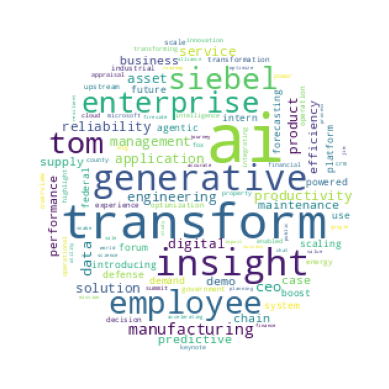

In [7]:
counts.pop("will", None)

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    mask=mask
).generate_from_frequencies(counts)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### fine tuning NLP

In [25]:
nouns_title_list = [" ".join(extract_nouns(title)) for title in title_list]
full_text = " ".join(nouns_title_list)

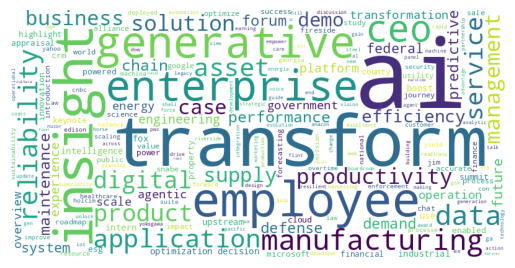

In [26]:
def normalize_word(word):
    # basic plural handling
    if word.endswith("ies"):
        return word[:-3] + "y"      # parties -> party
    # elif word.endswith("es"):
    #     return word[:-2]            # boxes -> box
    elif word.endswith("s") and not word.endswith("ss"):
        return word[:-1]            # dogs -> dog
    return word

words = re.findall(r"\b[a-zA-Z]+\b", full_text.lower())

# normalize
normalized = [normalize_word(w) for w in words]

stopwords = set(STOPWORDS)
filtered = [w for w in normalized if w not in stopwords]

# count
counts = Counter(filtered)

counts.pop("will", None)
counts.pop("tom", None)
counts.pop("siebel", None)


wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
).generate_from_frequencies(counts)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### fine tuning wordcloud

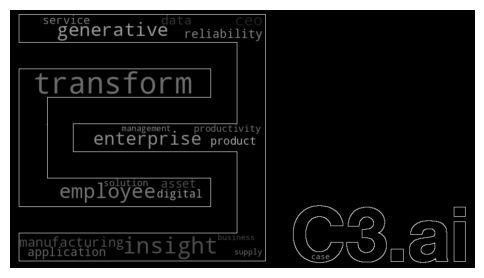

In [44]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

# Load mask image (your logo)
mask_img = Image.open("data/c3-ai-logo-vector.png").convert("RGB")
# mask_img = Image.open("data/c3ai_logo.png").convert("RGB")
mask = np.array(mask_img)

counts.pop("ai", None)

wc = WordCloud(
    background_color="black",
    mask=mask,
    mode="RGB",
    prefer_horizontal=1.0,
    contour_width=1,
    contour_color="white"
# ).generate(full_text)
).generate_from_frequencies(dict(counts.most_common(20)))

# Color words using the original image colors (like the example link)
image_colors = ImageColorGenerator(mask)
wc = wc.recolor(color_func=image_colors)

plt.figure(figsize=(6, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


### Topic Modelling

In [1]:
from bertopic import BERTopic
topic_model = BERTopic.load("MaartenGr/BERTopic_Wikipedia")

/home/ohassanaly/work/learning/audio/.venv/lib/python3.13/site-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning:

invalid escape sequence '\{'



topics.json:   0%|          | 0.00/10.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

topic_embeddings.safetensors:   0%|          | 0.00/3.65M [00:00<?, ?B/s]

ctfidf_config.json: 0.00B [00:00, ?B/s]

ctfidf.safetensors:   0%|          | 0.00/46.4M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [16]:
topic, prob = topic_model.transform(title_list[0])
topic_model.topic_labels_[int(topic)]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:58:52,712 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/511192112.py:2: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



'1947_enterprise_enterprises_organizational_business'

In [17]:
topic_list=[]
for title in title_list:
    topic, prob = topic_model.transform(title_list[0])
    topic_list.append(topic_model.topic_labels_[int(topic)])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:32,623 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:32,713 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:32,802 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:32,893 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:32,981 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,070 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,159 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,245 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,336 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,425 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,509 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,598 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,686 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,776 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,859 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,898 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:33,989 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,079 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,165 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,213 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,291 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,344 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,402 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,499 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,581 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,665 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,755 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,843 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,880 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:34,969 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,057 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,145 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,229 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,314 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,404 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,489 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,578 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,667 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,752 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,840 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,884 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:35,976 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,066 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,157 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,205 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,296 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,382 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,450 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,539 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,625 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,711 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,797 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,828 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,917 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:36,981 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,071 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,104 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,148 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,238 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,320 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,407 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,448 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,536 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,576 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,666 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,712 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,802 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,848 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:37,936 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,022 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,110 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,195 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,240 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,335 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,420 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,510 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,548 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,597 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,688 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,779 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,867 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,917 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:38,979 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,069 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,111 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,199 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,231 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,315 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,359 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,448 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,538 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,624 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,714 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,803 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,890 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:39,980 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,016 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,056 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,145 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,234 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,323 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,413 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,501 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,540 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,583 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,634 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,719 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,807 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,893 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:40,982 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,016 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,104 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,192 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,280 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,369 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,455 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,544 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,630 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,718 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,808 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,897 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:41,984 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,074 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,108 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,198 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,284 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,320 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,412 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,502 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,589 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,679 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,711 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,798 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,887 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,920 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:42,993 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,082 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,165 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,202 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,240 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,327 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,414 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,499 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,584 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,673 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,761 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,849 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:43,937 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,024 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,108 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,196 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,233 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,323 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,411 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,494 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,577 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,661 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,749 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,838 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,870 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:44,961 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,051 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,142 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,230 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,322 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,406 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,454 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,544 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,635 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,684 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,776 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,818 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,862 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,951 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:45,997 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,092 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,177 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,220 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,309 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,350 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,439 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,529 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,617 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,702 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,790 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,842 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:46,938 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,029 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,117 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,204 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,290 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,381 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,433 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,524 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,613 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,702 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,790 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,873 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:47,962 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:48,049 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:48,137 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:48,226 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:48,317 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:48,357 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:48,445 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:48,531 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:51,544 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:51,633 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:51,671 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:51,763 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:51,851 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:51,935 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:51,985 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,076 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,161 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,194 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,285 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,325 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,413 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,462 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,553 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,585 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,677 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,709 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,760 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,809 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,900 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:52,967 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,059 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,147 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,235 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,319 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,359 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,449 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,539 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,628 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,717 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,811 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,903 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:53,992 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,084 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,122 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,212 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,296 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,383 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,473 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,521 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,612 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,701 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,793 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,881 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:54,965 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,055 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,148 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,242 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,301 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,379 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,471 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,558 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,648 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,741 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,832 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,885 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:55,975 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:56,064 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:56,150 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:56,240 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:56,332 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:56,422 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:56,511 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:56,599 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2026-02-03 16:59:56,687 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.
/tmp/ipykernel_7901/2358555554.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

